<a href="https://colab.research.google.com/github/taliyameyswara/datamining2023/blob/main/regression_mydataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import Dataset

In [ ]:
dataset = pd.read_csv('bismillah.csv')

print("Jumlah data (baris, kolom):", dataset.shape)

# hanya 5 baris
dataset.head()

Jumlah data (baris, kolom): (6911, 4)


,Product Name,Current Price,Competitor Price,New Price
0,DUA KELINCI SUKRO ORI 100G,368000,316700,316700
1,DUA KELINCI SUKRO ORIGINAL 10X20GR,49200,49000,49000
2,DUA KELINCI TICTAC 10x16GR,54000,49200,49200
3,ENERGEN CEREAL CHOC RCG 10X34 G,267600,267700,267600
4,ENERGEN CEREAL KC IJO RCG 10X35 G,267600,267700,267600


# Check Missing Value

In [ ]:
# jumlah missing value
dataset.isnull().sum()

Product Name        0
Current Price       0
Competitor Price    0
New Price           0
dtype: int64

# Deklarasi X & Y

In [ ]:
x = dataset.drop(['New Price', 'Product Name'], axis=1).values
y = dataset['New Price'].values

In [ ]:
print(x)

[[368000 316700]
 [ 49200  49000]
 [ 54000  49200]
 ...
 [222000 209500]
 [222000 209500]
 [ 27300  27300]]


In [ ]:
print(y)

[316700  49000  49200 ... 224400 224400  27300]


# Membagi dataset ke dalam training set dan test set

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,  test_size = 0.3, random_state = 0)

# Train model

In [ ]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

# Predict

In [ ]:
y_pred=ml.predict(x_test)
print(y_pred)

[202501.12138729 111158.42686425 357561.95204189 ... 113634.09658467
 163487.35189498  96395.46533146]


In [ ]:
ml.predict([[368000,316700]])

array([338158.7918655])

# Evaluate Model

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9231180003965632

# Plot Result

Text(0.5, 1.0, 'Actual vs Predicted')

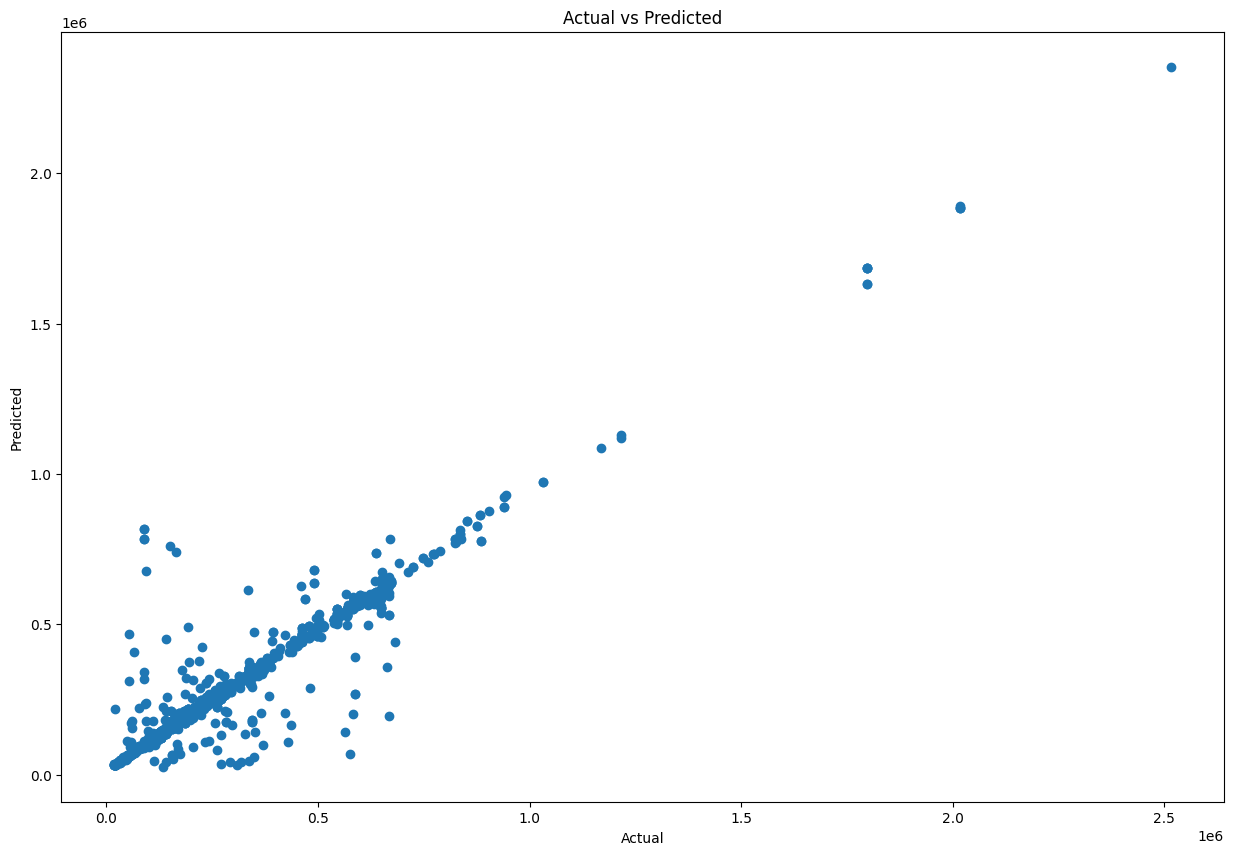

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

# Predicted Values

In [ ]:
pred_y_df=pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_y_df[0:20]

,Actual Value,Predicted Value,Difference
0,583000,202501.121387,380498.878613
1,103800,111158.426864,-7358.426864
2,366450,357561.952042,8888.047958
3,280000,212518.220931,67481.779069
4,184950,188174.910329,-3224.910329
5,342900,302608.860123,40291.139877
6,192000,218156.347305,-26156.347305
7,261000,256630.939756,4369.060244
8,80000,88675.224446,-8675.224446
9,58800,67523.139970,-8723.139970
